# Example 01: MNIST Demo

## (i) Import libraries

In [2]:
import sys
sys.path.append('../')
import matplotlib
import matplotlib.pyplot as plt
import visualization

## (ii) Plot classification accuracy
The dotted lines correspond to the epoch number at which the refinement phase started. 

['/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2light/run0/checkpoints/records.pkl', '/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2light/run1_width_0.2/checkpoints/records.pkl']
['/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2light/run0/checkpoints/model.pth', '/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2light/run1_width_0.2/checkpoints/model.pth']


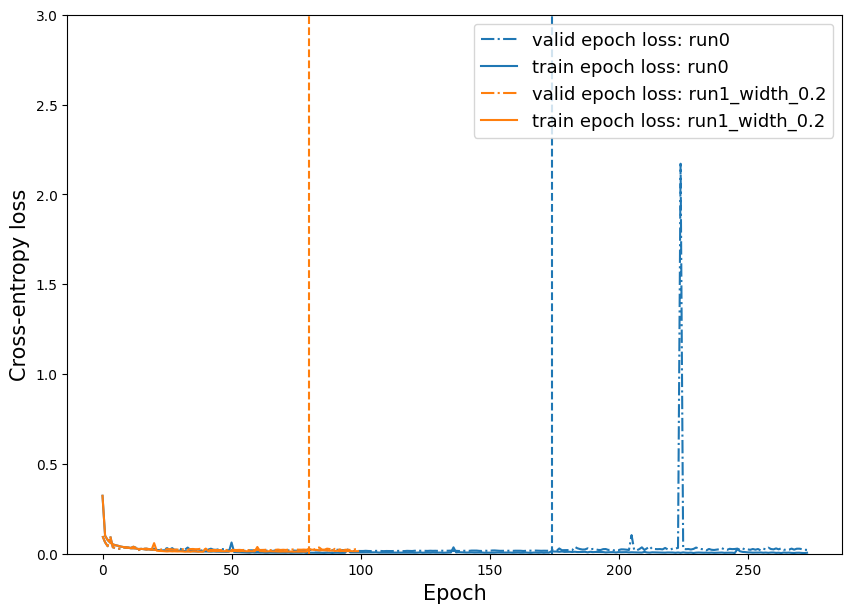

run0: test accuracy = 99.52999877929688
run1_width_0.2: test accuracy = 99.55999755859375


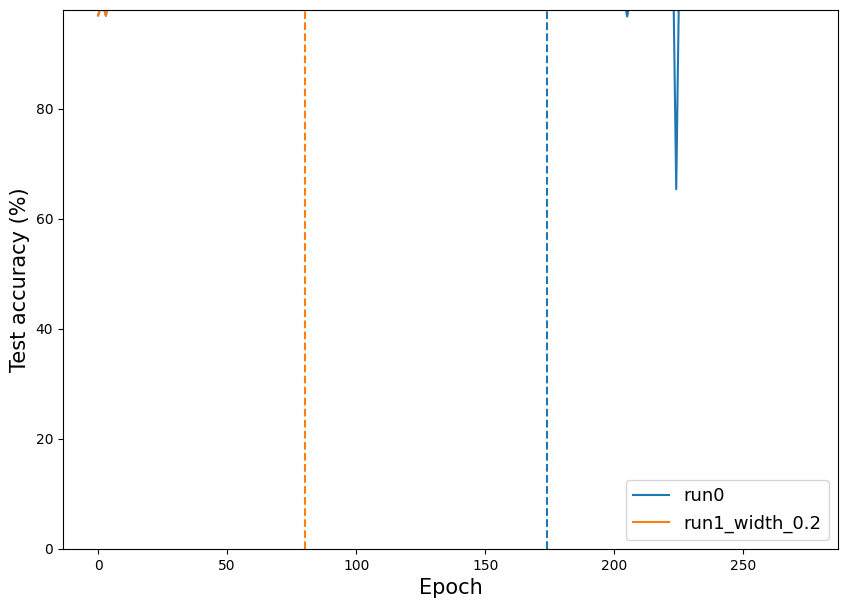

In [19]:
%matplotlib inline

exp_dir = '/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2light/'
# exp_dir = "/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2/"
# exp_dir = "/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2light//"
models_list = ["run0","run1_width_0.2"]
# models_list = ["run1_width_0.2"]

records_file_list = [exp_dir + model_name + '/checkpoints/records.pkl' for model_name in models_list]
model_files = [exp_dir + model_name + '/checkpoints/model.pth' for model_name in models_list]

print(records_file_list)
print(model_files)

visualization.plot_performance(records_file_list, models_list, ymax = 3.0, figsize=(10,7), finetune_position=True)
visualization.plot_accuracy(records_file_list, models_list, figsize=(10,7), ymin=0, ymax=98, finetune_position=True)

## (iii) Compute model size

In [20]:
_ = visualization.compute_number_of_params(model_files, models_list, is_gpu=False)


Model: run0
Number of parameters summary:
    Total: 1062440 
    Max per branch: 1048579 
    Min per branch: 1048579 
    Average per branch: 1048579.0

Model: run1_width_0.2
Number of parameters summary:
    Total: 1062440 
    Max per branch: 1048579 
    Min per branch: 1048579 
    Average per branch: 1048579.0


## (iv) Visualise the tree structure

     Plotting:  hist_split_node_002.png


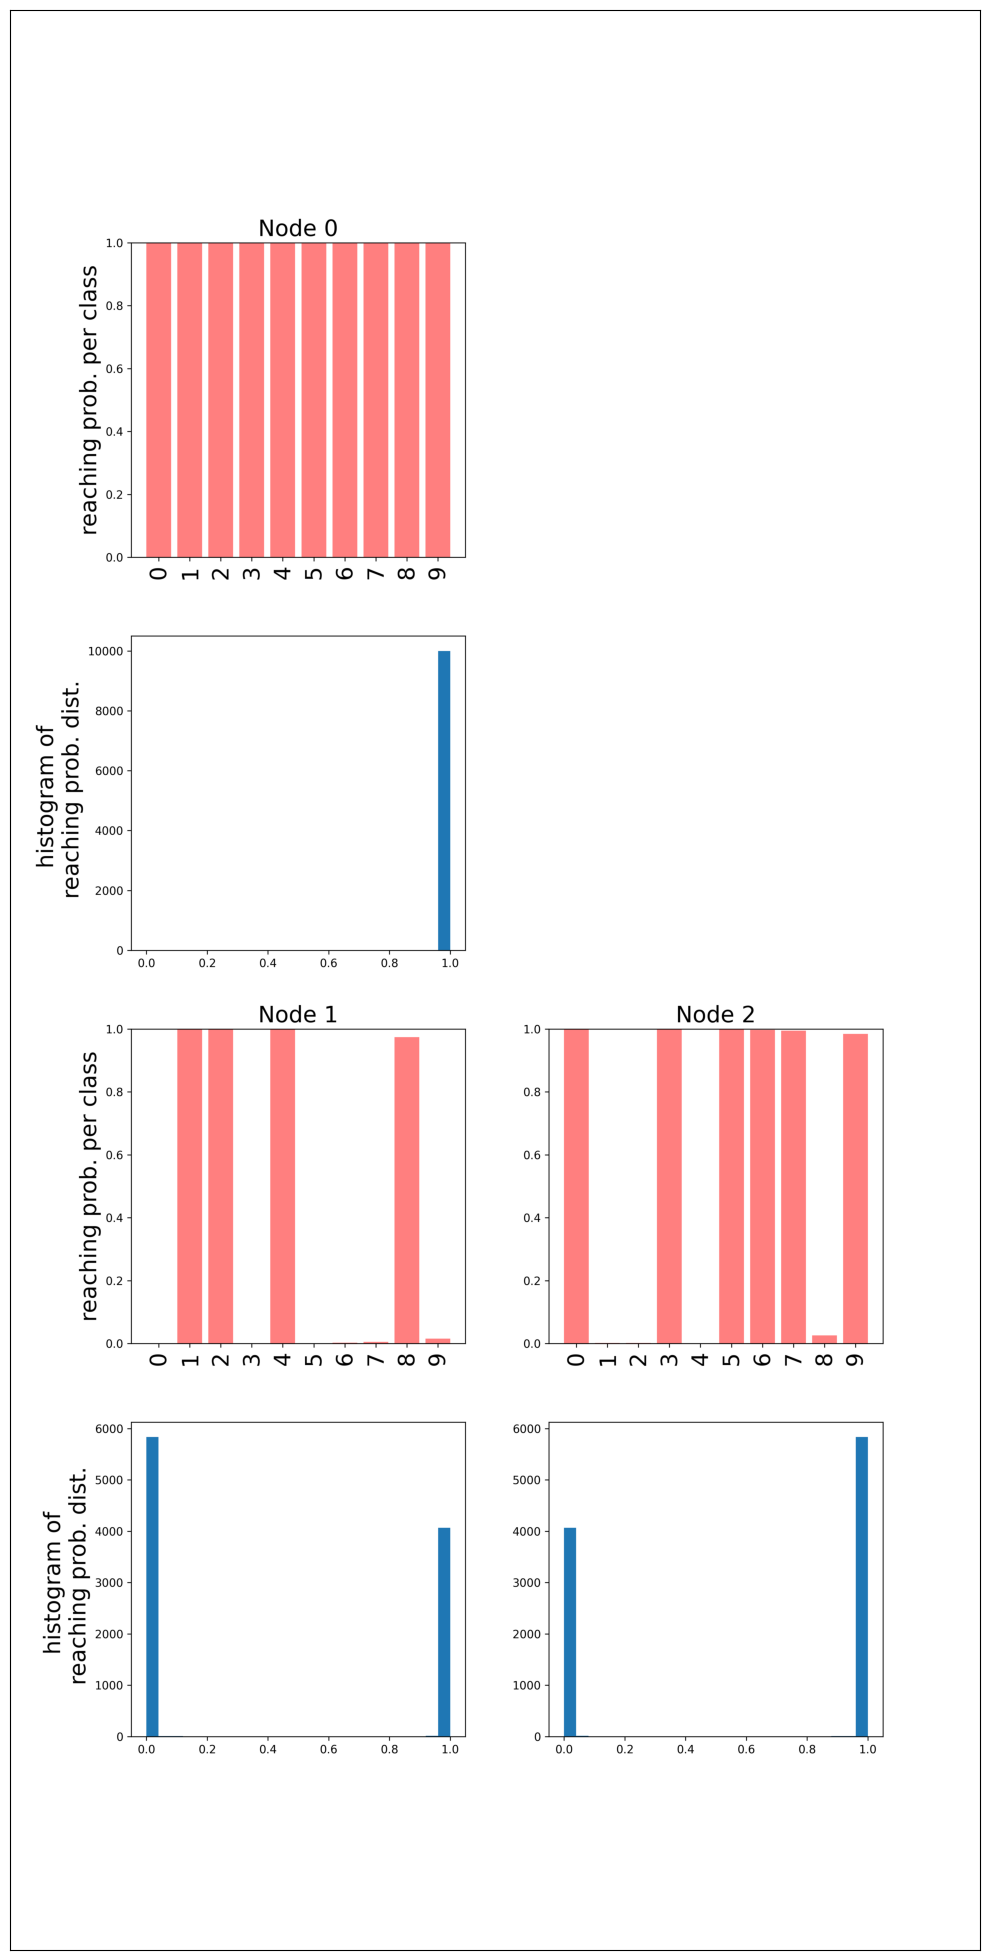

In [5]:
fig_dir = exp_dir + 'run0' + '/figures/'
visualization.visualize_treestructures(fig_dir, figsize=(10,20))

# FLOPs and model size with ptflops

In [13]:
from models import Tree
from utils import load_tree_model

model_path = "/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2light/run0/checkpoints/model.pth"
# model_path = "/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2light/run1_width_0.2/checkpoints/model.pth"
model = load_tree_model(model_path)
print(model)

Tree(
  (tree_modules): ModuleList(
    (0): Sequential(
      (transform): Root_MBV2light(
        (features): Sequential(
          (0): InvertedResidual(
            (conv): Sequential(
              (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU6(inplace=True)
              (3): Conv2d(1, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
          )
          (1): InvertedResidual(
            (conv): Sequential(
              (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU6(inplace=True)
              (3): Conv2d(96, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), group

In [14]:
import ptflops

inputres = (1,28,28)
flops, params = ptflops.get_model_complexity_info(model, inputres, as_strings=True, print_per_layer_stat=True)
print('Flops:  ' + flops)
print('Params: ' + params)

prob before: tensor(nan, grad_fn=<MulBackward0>)
prob after: tensor([nan], grad_fn=<UnsqueezeBackward0>)
prob before: tensor(nan, grad_fn=<MulBackward0>)
prob after: tensor([nan], grad_fn=<UnsqueezeBackward0>)
Tree(
  233.81 k, 100.000% Params, 27.81 MMac, 100.000% MACs, 
  (tree_modules): ModuleList(
    233.81 k, 100.000% Params, 27.81 MMac, 100.000% MACs, 
    (0): Sequential(
      206.08 k, 88.143% Params, 27.78 MMac, 99.900% MACs, 
      (transform): Root_MBV2light(
        0, 0.000% Params, 27.37 MMac, 98.418% MACs, 
        (features): Sequential(
          0, 0.000% Params, 27.37 MMac, 98.418% MACs, 
          (0): InvertedResidual(
            0, 0.000% Params, 94.08 KMac, 0.338% MACs, 
            (conv): Sequential(
              0, 0.000% Params, 94.08 KMac, 0.338% MACs, 
              (0): Conv2d(0, 0.000% Params, 14.11 KMac, 0.051% MACs, 1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(0, 0.000% Params, 3.14 KMac, 0.011%